# Credit card fraud detection 
_(with balancing)_

#### Goal is to recognize fraudulent credit card transactions .

In [1]:
# Required libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns  

In [2]:
# Load the dataset 
data = pd.read_csv("data.csv") 

### Exploration and pre-processing

In [3]:
# Total size of the dataset
print(data.shape)

(284807, 31)


In [4]:
# Statistical values of each fields
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.165980e-15,3.416908e-16,-1.373150e-15,2.086869e-15,9.604066e-16,1.490107e-15,-5.556467e-16,1.177556e-16,-2.406455e-15,...,1.656562e-16,-3.444850e-16,2.578648e-16,4.471968e-15,5.340915e-16,1.687098e-15,-3.666453e-16,-1.220404e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [5]:
# Fields and data types
#data.dtypes

In [6]:
# First few rows
data.head(3) 

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0


In [7]:
# counting duplicates, if any
dups = data.groupby(data.columns.tolist()).size().reset_index().rename(columns={0:'count'})
dups['count'].sum() - dups.shape[0]

1081

In [8]:
# Checking missing values per column
print("missing values:", data.isnull().values.any())

missing values: False


In [9]:
# Correlation matrix 
corrmat = data.corr() 

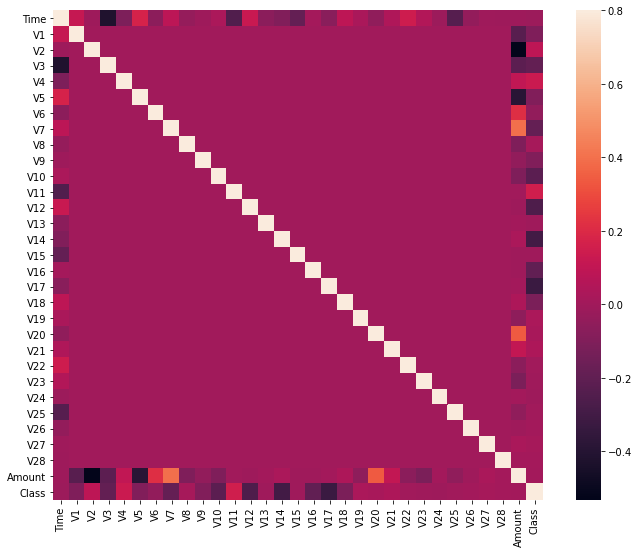

In [10]:
# Checking feature correlation - plot
fig = plt.figure(figsize = (12, 9)) 
sns.heatmap(corrmat, vmax = .8, square = True) 
plt.show() 

Features don’t look highly correlated but ‘Amount’ feature seems to have positive correlation with 'V7' and 'V20' as well as negative correlation with 'V2' and 'V5'. We can see some correlation between ‘Time’ and other features, also.

In [11]:
# Target class segregation
fraud = data[data['Class'] == 1] 
valid = data[data['Class'] == 0]

In [12]:
# Determine number of fraud cases in dataset  
outlierFraction = len(fraud)/float(len(valid)) 
print('Fraud transactions are only {}% of total transactions'.format(outlierFraction*100)) 
print('Fraud Cases: {}'.format(len(data[data['Class'] == 1]))) 
print('Valid Transactions: {}'.format(len(data[data['Class'] == 0]))) 

Fraud transactions are only 0.17304750013189596% of total transactions
Fraud Cases: 492
Valid Transactions: 284315


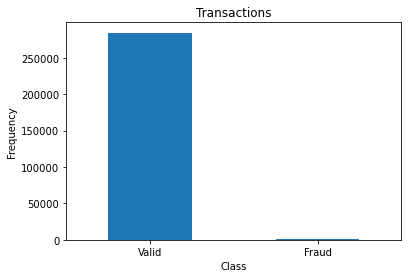

In [13]:
# Checking target class distribution: Balance in dataset

count_classes = pd.value_counts(data['Class'], sort=True)
count_classes.plot(kind='bar', rot=0)
plt.title("Transactions")
plt.xticks(range(2), ['Valid', 'Fraud'])
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.show()

Our data is highly imbalanced. We cannot use supervised learning algorithms **directly**, because it will overfit based on the ‘Valid transaction’ examples.

Let's see the distribution of all the input features.

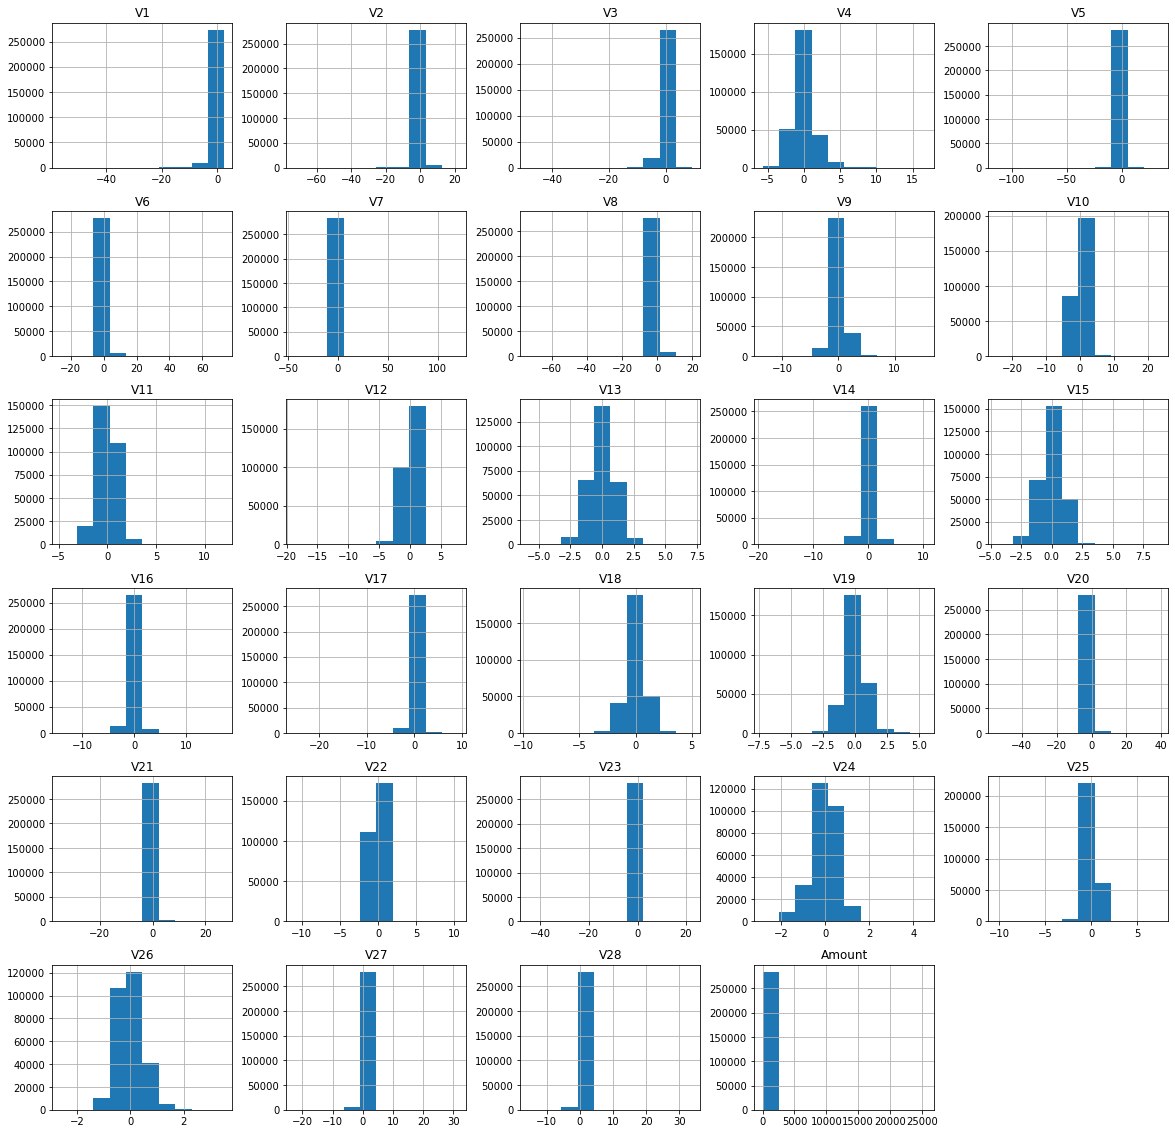

In [14]:
# Taking the independent variables
features = ['V%d' % number for number in range(1, 29)] + ['Amount']

# Dependent variable or target 
target = 'Class'

# Independent and dependent variables separation
X = data[features]
y = data[target]

# Plot histograms of each parameter
X.hist(figsize = (20, 20))
plt.show()


Problem is, the variables don't have same scale and distribution. Some of the variables have very wide range of values for ex. 'Amount' variable. Machine learning algorithms works better if the variables use same scale. We will normalize the variables using StandardScaler function from scikit-learn.

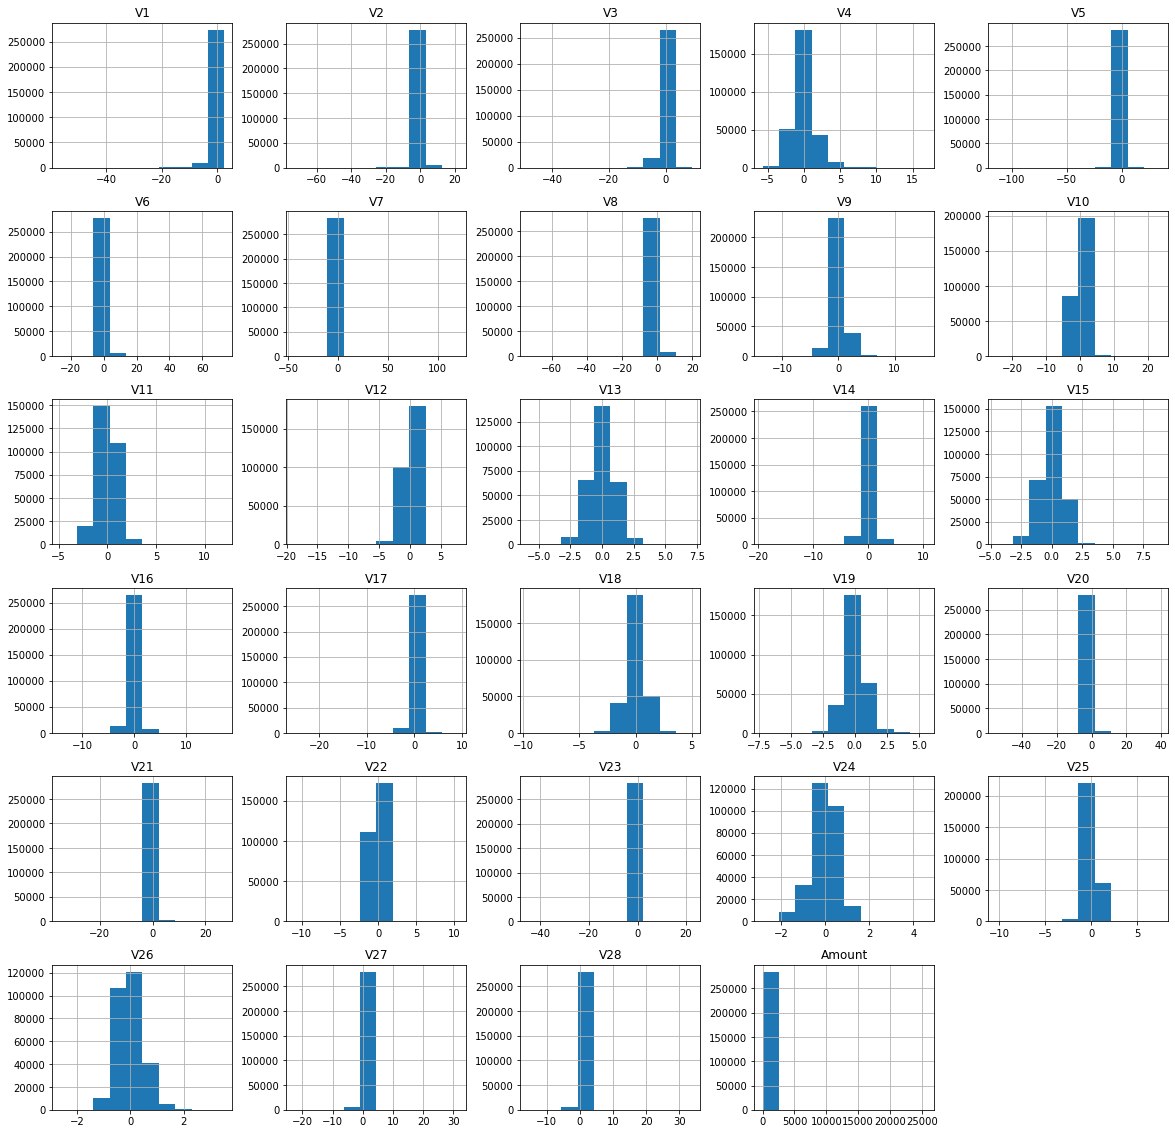

In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit(X)

# histograms of each variable
X.hist(figsize = (20, 20))
plt.show()

Now all the features are normally distributed around zero. [Standard Scaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)

In [16]:
# Droping the time feature, because the model should recognize fraud cases any (i.e. independent of) time 
data.drop(['Time'], axis=1, inplace=True)

### Balancing the class by oversampling using python Imbalanced-Learn Library
(sudo pip install imbalanced-learn)

[Over-sampling: a practical guide](https://imbalanced-learn.readthedocs.io/en/stable/over_sampling.html)


In [17]:
# check version number
import imblearn
print(imblearn.__version__)

0.7.0


In [18]:
# Random oversampling to balance the class distribution
from collections import Counter
from imblearn.over_sampling import RandomOverSampler

# summarize class distribution
print(Counter(y))

# oversampling strategy
oversample = RandomOverSampler(sampling_strategy='minority')

# fit and apply the transform
X_over, y_over = oversample.fit_resample(X, y)

# summarize class distribution after oversampling
print(Counter(y_over))

Counter({0: 284315, 1: 492})
Counter({0: 284315, 1: 284315})


Now fraud cases match with the valid cases.

In [19]:
# Using Skicit-learn to split data into training and testing sets 
from sklearn.model_selection import train_test_split 

# Split the data into training and testing sets 
xTrain_over, xTest_over, yTrain_over, yTest_over = train_test_split( X_over, y_over, test_size = 0.2, random_state = 42) 

### Model building, training and testing

In [20]:
# Logistic regression

from sklearn.linear_model import LogisticRegression
lR = LogisticRegression(max_iter=1000)

# Training the model
lR.fit(xTrain_over, yTrain_over)

# Test the model using 'predict' method
yPred_lR_over = lR.predict(xTest_over)

# Print the classification report
from sklearn.metrics import classification_report
print(classification_report(yTest_over, yPred_lR_over))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95     56750
           1       0.98      0.92      0.95     56976

    accuracy                           0.95    113726
   macro avg       0.95      0.95      0.95    113726
weighted avg       0.95      0.95      0.95    113726



In [21]:
# Random Forest Classifier 
from sklearn.ensemble import RandomForestClassifier 

# Random forest 
rF = RandomForestClassifier() 

# Training the model
rF.fit(xTrain_over, yTrain_over) 

# predictions 
yPred_rF_over = rF.predict(xTest_over) 

# Print the classification report
from sklearn.metrics import classification_report
print(classification_report(yTest_over, yPred_rF_over))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56750
           1       1.00      1.00      1.00     56976

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726



After balancing the data, logistic Regression achieved 95% accuracy and able to detect fraud cases with 98% precision.

However, Random Forest achieved 100% accuracy and 100% precision, which could mean that the model is simply memorizing the training data, in other words, it overfits.

### Citation:
[Muhammad Rizwan](https://engmrk.com/module-19-credit-card-fraud-detection/?utm_campaign=News&utm_medium=Community&utm_source=DataCamp.com
)
[Christos Mousmoulas](https://towardsdatascience.com/credit-card-fraud-detection-1b3b3b44109b)